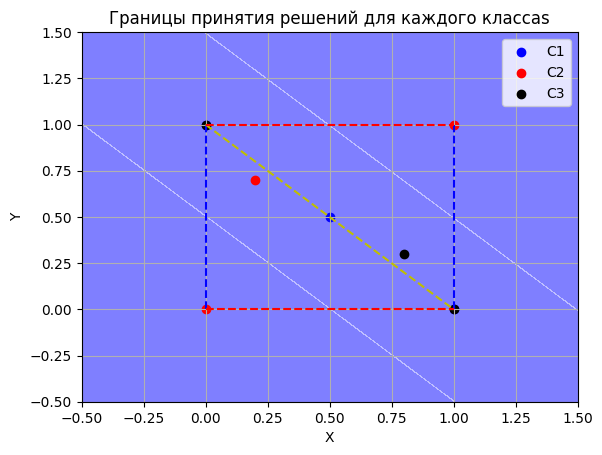

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def act(x):
    return 0 if x <= 0 else 1

def go(C):
    x = np.array([C[0], C[1], 1])
    w1 = [1, 1, -1.5]
    w2 = [1, 1, -0.5]
    w_hidden = np.array([w1, w2])
    w_out = np.array([-1, 1, -0.5])

    sum = np.dot(w_hidden, x)
    out = [act(x) for x in sum]
    out.append(1)
    out = np.array(out)

    sum = np.dot(w_out, out)
    y = act(sum)
    return y

C1 = [(1, 0), (0, 1)]
C2 = [(0, 0), (1, 1)]
C3 = [(0, 1), (1, 0)]

# Определите сетку
x = np.linspace(-0.5, 1.5, 100)
y = np.linspace(-0.5, 1.5, 100)
X, Y = np.meshgrid(x, y)

# Вычислите прогнозируемый класс для каждой точки в сетке
Z1 = np.zeros_like(X)
Z2 = np.zeros_like(X)
Z3 = np.zeros_like(X)
for i in range(len(x)):
    for j in range(len(y)):
        C = [(X[i, j], Y[i, j])]
        Z1[i, j] = go(C[0]) if go(C1[0]) == 1 else -1
        Z2[i, j] = go(C[0]) if go(C2[0]) == 1 else -1
        Z3[i, j] = go(C[0]) if go(C3[0]) == 1 else -1

# Постройте границы решений для каждого класса отдельно
plt.contourf(X, Y, Z1, alpha=0.5, levels=[-0.5, 0.5, 1.5], colors="blue")
plt.contourf(X, Y, Z2, alpha=0.5, levels=[-0.5, 0.5, 1.5], colors="yellow")
plt.contourf(X, Y, Z3, alpha=0.5, levels=[-0.5, 0.5, 1.5], colors="white")

# Постройте точки данных для каждого класса отдельно
plt.scatter([C1[0][0], C1[1][0], 0.5], [C1[0][1], C1[1][1], 0.5], color="blue", label="C1")
plt.scatter([C2[0][0], C2[1][0], 0.2], [C2[0][1], C2[1][1], 0.7], color="red", label="C2")
plt.scatter([C3[0][0], C3[1][0], 0.8], [C3[0][1], C3[1][1], 0.3], color="black", label="C3")

# Нанесите диапазоны каждого класса пунктирными линиями
plt.plot([0, 0], [0, 1], "b--")
plt.plot([1, 1], [0, 1], "b--")
plt.plot([0, 1], [1, 0], "y--")
plt.plot([0, 1], [0, 0], "y--")
plt.plot([0, 1], [1, 1], "r--")
plt.plot([0, 1], [0, 0], "r--")

plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.title("Границы принятия решений для каждого классаs")
plt.xlim([-0.5, 1.5])
plt.ylim([-0.5, 1.5])
plt.grid(True)

# Установите цвет фона на белый
ax = plt.gca()
ax.set_facecolor('blue')

plt.show()
